In [1]:
import pandas as pd

data1 = pd.read_csv("data1.csv")


In [2]:
#filtering only transfer and cash_out data
data_by_type=data1[data1['type'].isin(['TRANSFER','CASH_OUT'])]

In [3]:
X = data1.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = data1['isFraud']

In [4]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [8]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Before SMOTE:
0    837942
1       918
Name: isFraud, dtype: int64

After SMOTE:
0    837942
1    837942
Name: isFraud, dtype: int64


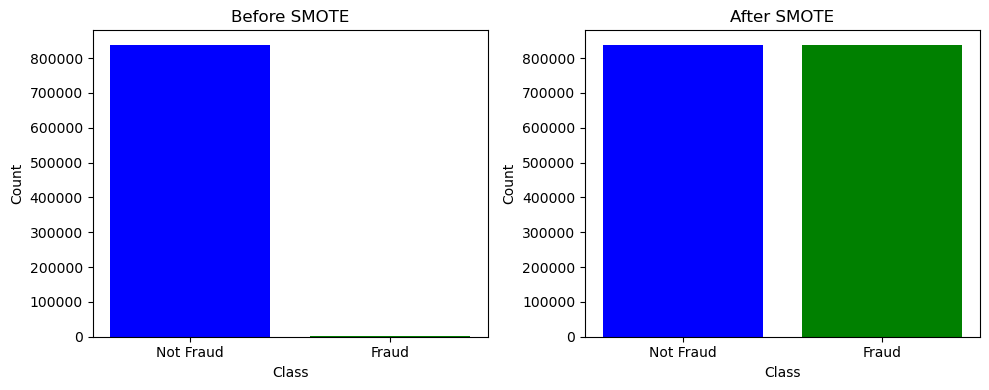

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each class before SMOTE
not_fraud_before_smote = (y_train == 0).sum()
fraud_before_smote = (y_train == 1).sum()

# Count the occurrences of each class after SMOTE
not_fraud_after_smote = (y_train_resampled == 0).sum()
fraud_after_smote = (y_train_resampled == 1).sum()

# Plot histogram
plt.figure(figsize=(10, 4))

# Before SMOTE
plt.subplot(1, 2, 1)
plt.bar(['Not Fraud', 'Fraud'], [not_fraud_before_smote, fraud_before_smote], color=['blue', 'green'])
plt.title('Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(1, 2, 2)
plt.bar(['Not Fraud', 'Fraud'], [not_fraud_after_smote, fraud_after_smote], color=['blue', 'green'])
plt.title('After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9962568247383353
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.21      0.93      0.35       224

    accuracy                           1.00    209715
   macro avg       0.61      0.96      0.67    209715
weighted avg       1.00      1.00      1.00    209715



In [11]:
import seaborn as sns

Accuracy: 0.9962568247383353
Precision: 0.2128966223132037
Recall: 0.9285714285714286
F1 Score: 0.3463780183180683


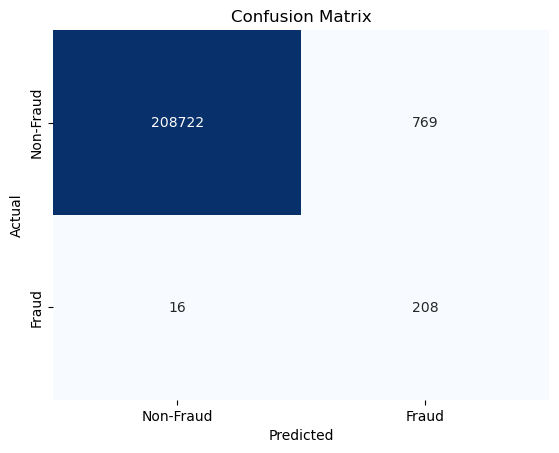

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9945831247168777
Precision: 0.14094488188976378
Recall: 0.7991071428571429
F1 Score: 0.23962516733601075


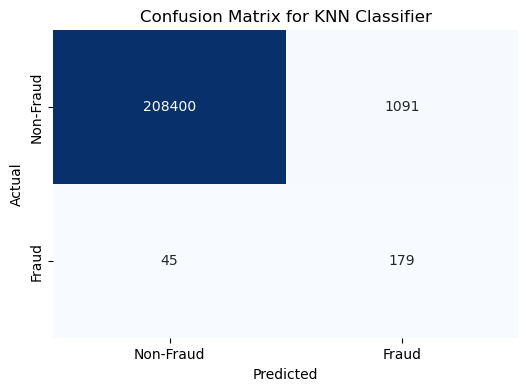

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.svm import SVC


# Create SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
